# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [2]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [3]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [4]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [5]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
#adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
#adata = adata[:, adata.var.index.isin(genes)]
adata

AnnData object with n_obs × n_vars = 23061 × 70263
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [6]:
adata.obs.cell_type.unique().tolist()

['fibroblast',
 'endothelial cell',
 'lymphocyte',
 'pericyte',
 'glial cell',
 'myofibroblast cell',
 'stromal cell']

(23059, 70263)
(23059, 70263)
AQ5
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.2639343785122037 mse_loss: 0.22218527225777507 kl_loss: 0.041325404308736324 sparse_loss: 0.00042370674964331556
epoch: 2 0.26077878568321466 mse_loss: 0.2168592414818704 kl_loss: 0.04343503050040454 sparse_loss: 0.00048450930626131594
epoch: 4 0.19752204418182373 mse_loss: 0.15899708401411772 kl_loss: 0.038014901510905474 sparse_loss: 0.0005100571470393334
epoch: 5 0.1919847559183836 mse_loss: 0.15293756127357483 kl_loss: 0.038519704598002136 sparse_loss: 0.0005274882205412723
epoch: 7 0.16666477033868432 mse_loss: 0.12751400377601385 kl_loss: 0.03861100081121549 sparse_loss: 0.0005397630193328951
epoch: 8 0.1790259825065732 mse_loss: 0.139769425150007 kl_loss: 0.03870780870784074 sparse_loss: 0.0005487477392307483
epoch: 10 0.16958926990628242 mse_loss: 0.13208525953814387 kl_loss: 0.03694619977613911 sparse_loss: 0.0005578058007813524
epoch: 11 0.14680638955906034 mse_loss: 0.10918568982742727 kl_loss: 0.03705717553384602 sparse_loss: 0.0005635184279526584
epoch: 13 0.130

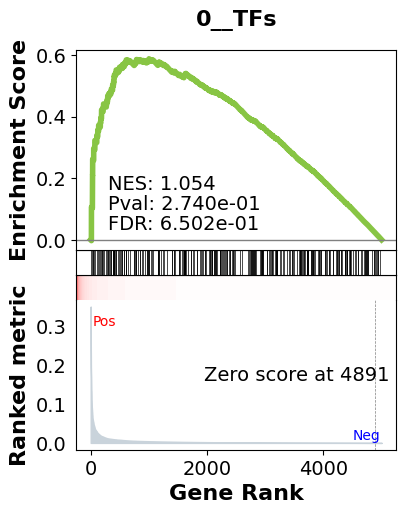

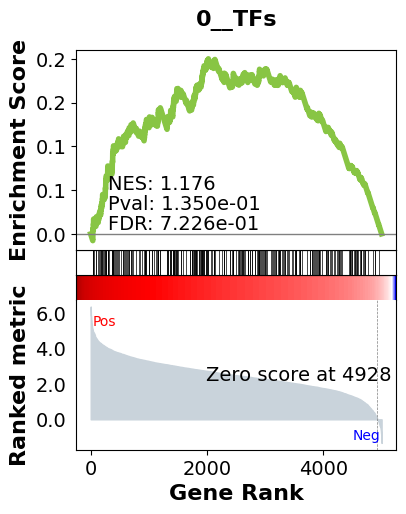

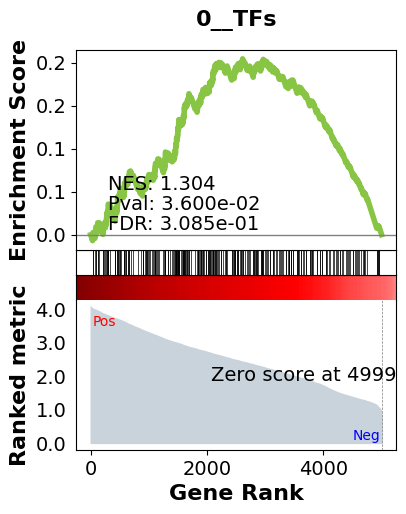

_________________________________________
TF specific enrichment
found some significant results for  35.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2561 genes
intersection pct: 0.5122
precision:  0.0014236547065040034 
recall:  0.9998929565403554 
random precision: 0.0014238071157435391


 97%|█████████▋| 124/128 [00:01<00:00, 87.11it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 82.89it/s]


Average Precision (AP):  0.0014387379494785464
Area Under Precision-Recall Curve (AUPRC):  0.0014369898106475136
EPR: 0.9772918243441381


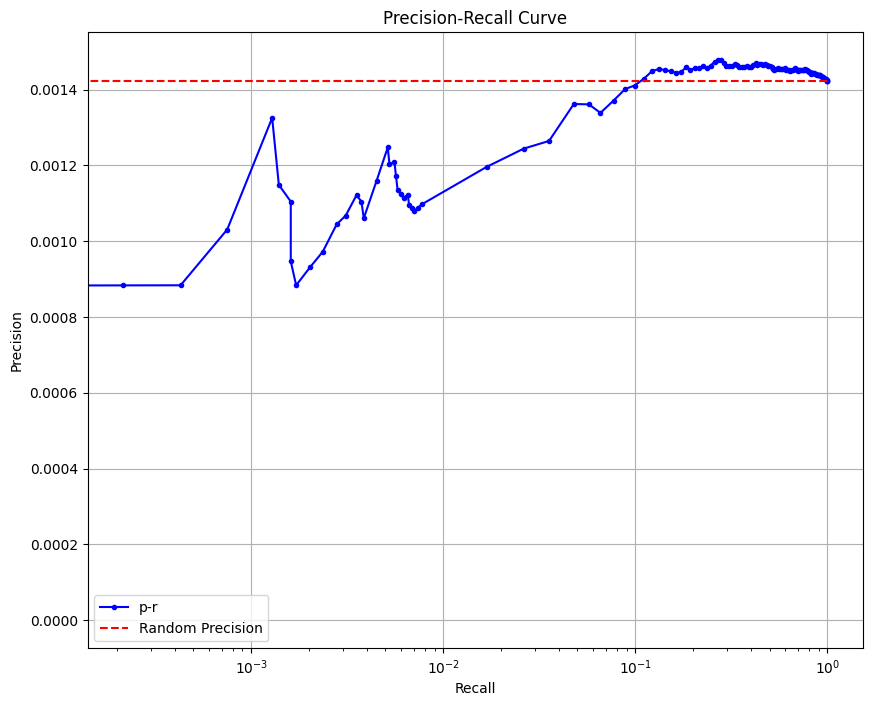

base enrichment
Top central genes: []


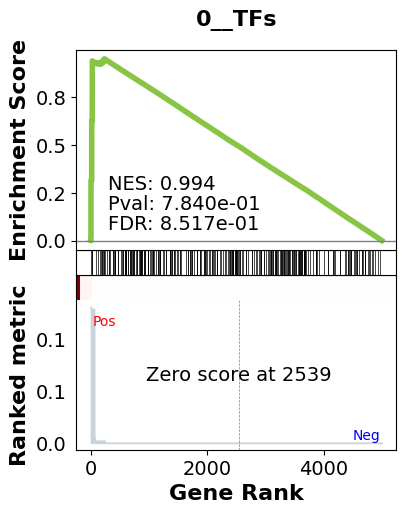

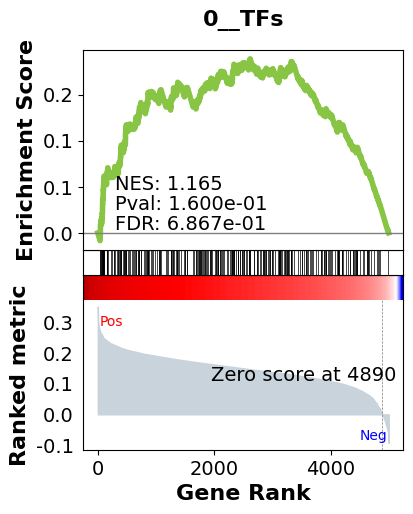

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2561 genes
intersection pct: 0.5122
precision:  0.00944079094597744 
recall:  0.6547848426461144 
random precision: 0.0014238071157435391


 94%|█████████▍| 120/128 [00:01<00:00, 90.30it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 91.71it/s]


Average Precision (AP):  0.006256260966209033
Area Under Precision-Recall Curve (AUPRC):  0.006354670285213024
EPR: 4.864360155222592


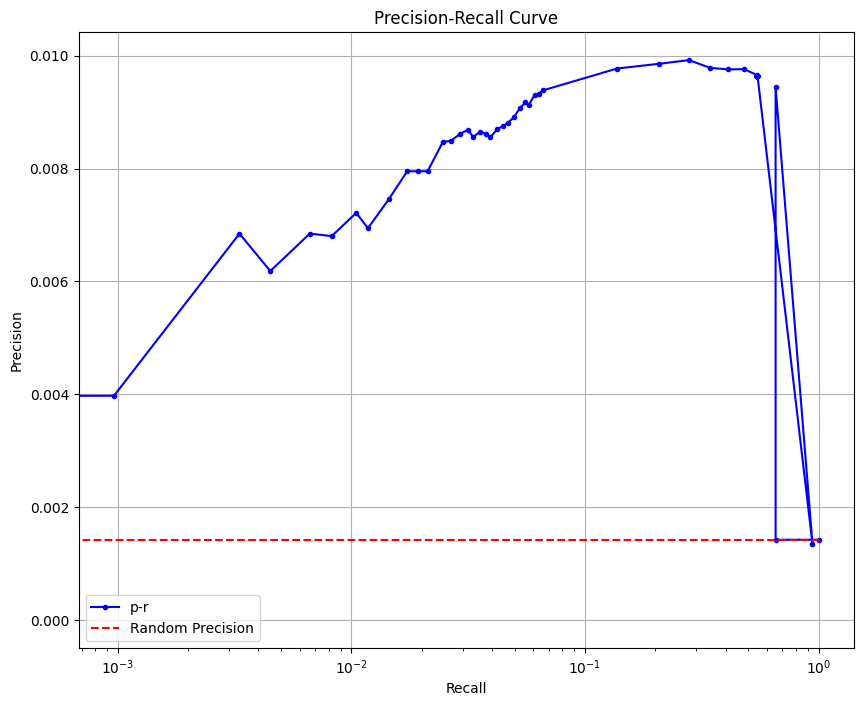

(23059, 70263)
il5
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.3867136798799038 mse_loss: 0.341647875495255 kl_loss: 0.044668193091638386 sparse_loss: 0.00039762231790518854
epoch: 2 0.3928217487409711 mse_loss: 0.34426792524755 kl_loss: 0.04810975899454206 sparse_loss: 0.0004440638604137348
epoch: 4 0.27934900391846895 mse_loss: 0.233000285923481 kl_loss: 0.045888758497312665 sparse_loss: 0.00045996041444595903
epoch: 5 0.31426352355629206 mse_loss: 0.26604785211384296 kl_loss: 0.047740056877955794 sparse_loss: 0.000475619533972349
epoch: 7 0.29930345714092255 mse_loss: 0.25648909341543913 kl_loss: 0.0423295539803803 sparse_loss: 0.00048481480007467326
epoch: 8 0.31064839102327824 mse_loss: 0.2665898213163018 kl_loss: 0.04356416477821767 sparse_loss: 0.0004944035936205182
epoch: 10 0.23437588848173618 mse_loss: 0.18954830197617412 kl_loss: 0.04431919113267213 sparse_loss: 0.0005083925752842333
epoch: 11 0.22107476368546486 mse_loss: 0.17474750941619277 kl_loss: 0.04580415436066687 sparse_loss: 0.0005230991446296684
epoch: 13 0.28348339

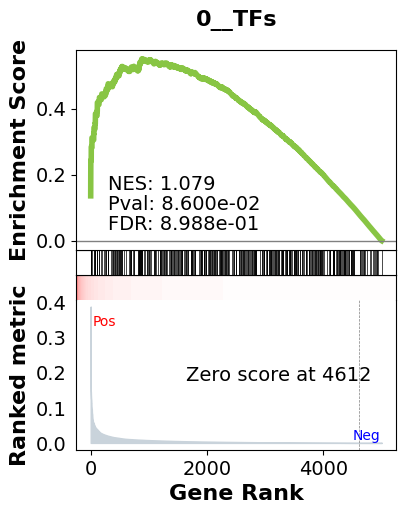

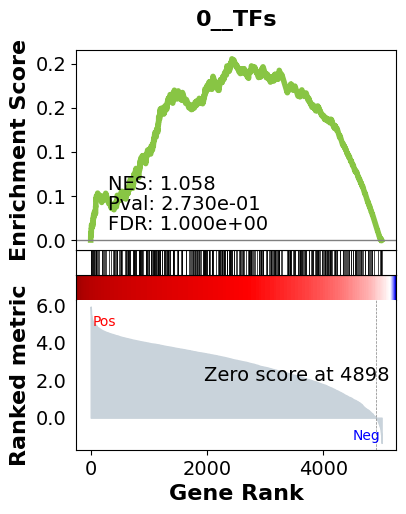

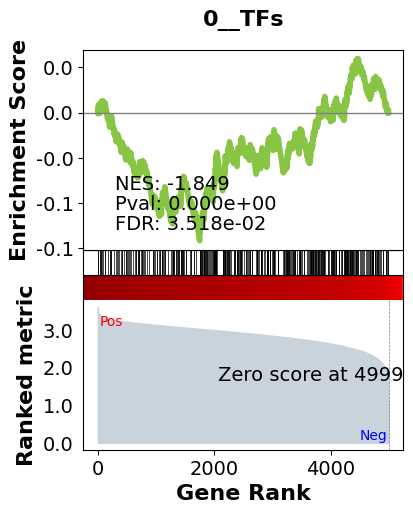

_________________________________________
TF specific enrichment
found some significant results for  8.19672131147541 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.0017694678984615335 
recall:  0.9999097880018042 
random precision: 0.001769627540097988


 98%|█████████▊| 126/128 [00:02<00:00, 41.41it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.63it/s]


Average Precision (AP):  0.0016814219441790856
Area Under Precision-Recall Curve (AUPRC):  0.0016807209368701745
EPR: 0.9684732166944442


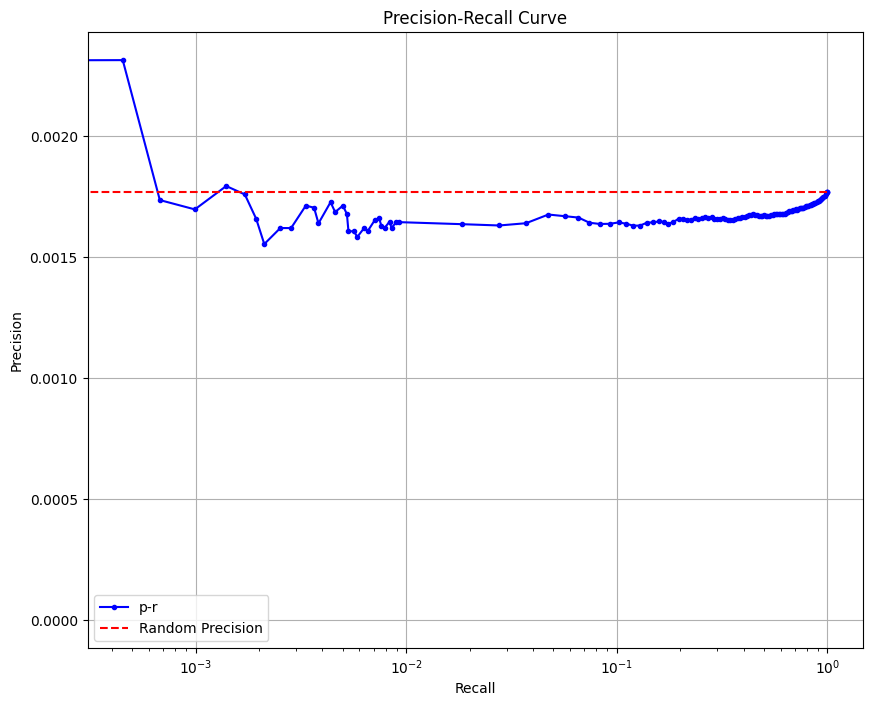

base enrichment
Top central genes: []


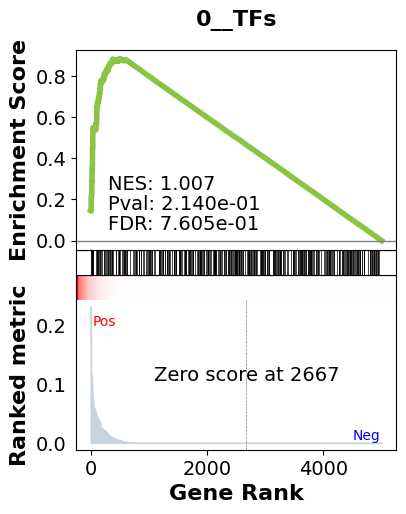

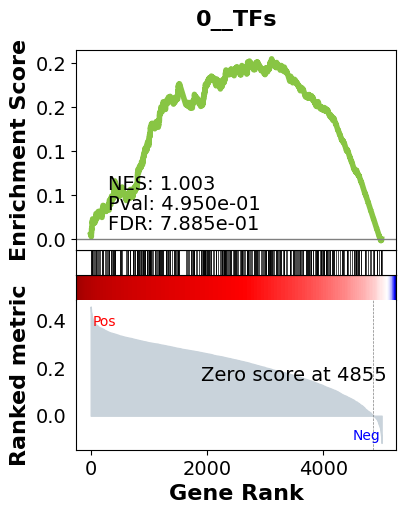

_________________________________________
TF specific enrichment
found some significant results for  3.278688524590164 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.007566481429154501 
recall:  0.4130807397383852 
random precision: 0.001769627540097988


 95%|█████████▌| 122/128 [00:02<00:00, 46.07it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.44it/s]


Average Precision (AP):  0.004077937807477664
Area Under Precision-Recall Curve (AUPRC):  0.00392153417872401
EPR: 4.515857439546


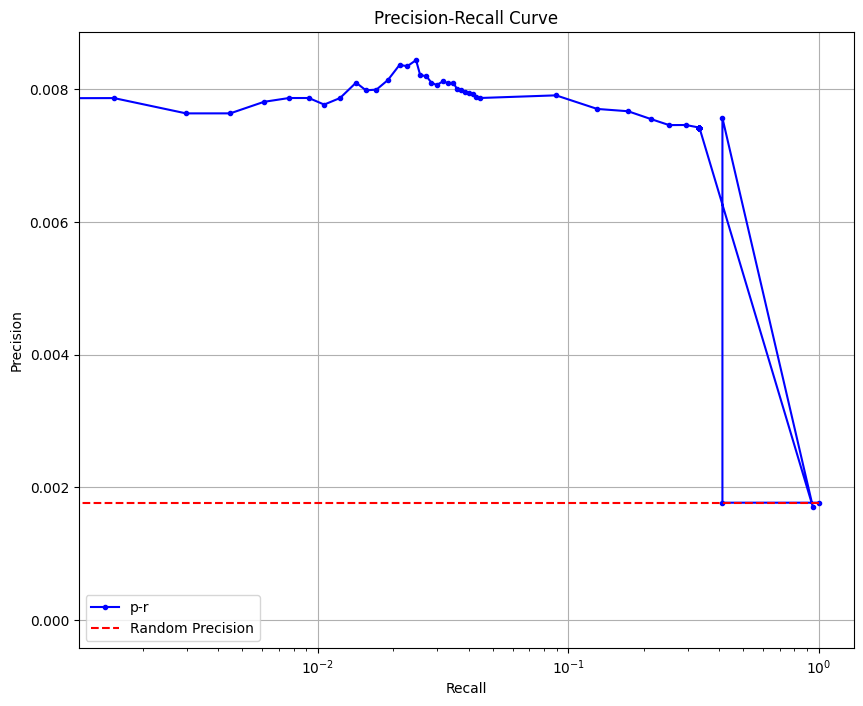

(23059, 70263)
mex
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.28216618299484253 mse_loss: 0.23726909141987562 kl_loss: 0.04448086314368993 sparse_loss: 0.00041623197466833517
epoch: 2 0.2722162529826164 mse_loss: 0.22418313194066286 kl_loss: 0.04755937587469816 sparse_loss: 0.0004737468061648542
epoch: 4 0.22313618380576372 mse_loss: 0.1795636573806405 kl_loss: 0.043076364672742784 sparse_loss: 0.0004961576469213469
epoch: 5 0.22682971321046352 mse_loss: 0.18292061751708388 kl_loss: 0.043395754182711244 sparse_loss: 0.000513338945893338
epoch: 7 0.20085983909666538 mse_loss: 0.16182066639885306 kl_loss: 0.03851011348888278 sparse_loss: 0.0005290556910040323
epoch: 8 0.2030108612962067 mse_loss: 0.16365022957324982 kl_loss: 0.03881733224261552 sparse_loss: 0.0005432979378383607
epoch: 10 0.1634362256154418 mse_loss: 0.12434837128967047 kl_loss: 0.038535689061973244 sparse_loss: 0.0005521637795027345
epoch: 11 0.15094797918573022 mse_loss: 0.11178504303097725 kl_loss: 0.03860493580577895 sparse_loss: 0.0005579993776336778
epoch: 13 0.150

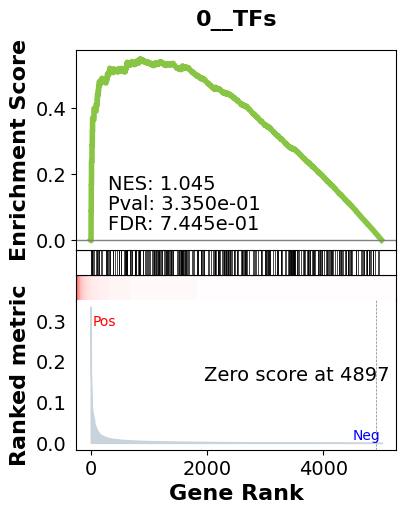

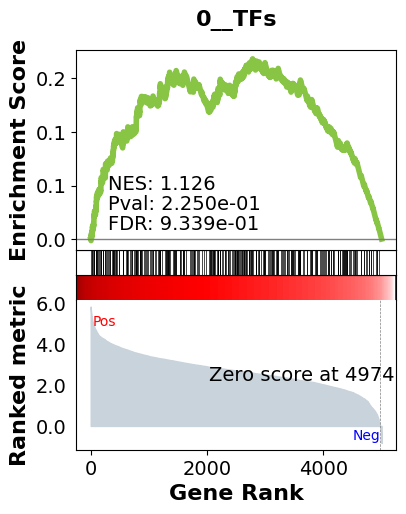

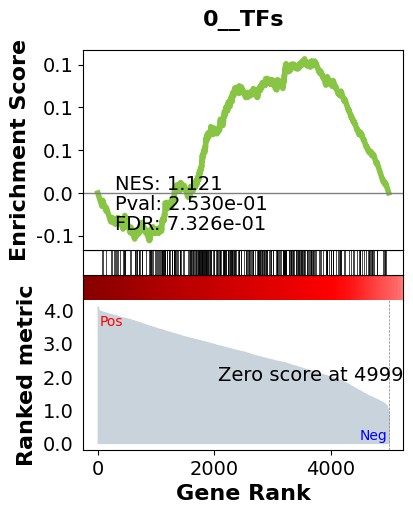

_________________________________________
TF specific enrichment
found some significant results for  43.75 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2742 genes
intersection pct: 0.5484
precision:  0.0005629457429939134 
recall:  1.0 
random precision: 0.0005629457429939134


 94%|█████████▍| 120/128 [00:01<00:00, 84.99it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 85.08it/s]


Average Precision (AP):  0.000544965179995048
Area Under Precision-Recall Curve (AUPRC):  0.0005442782180838425
EPR: 0.41957206489724974


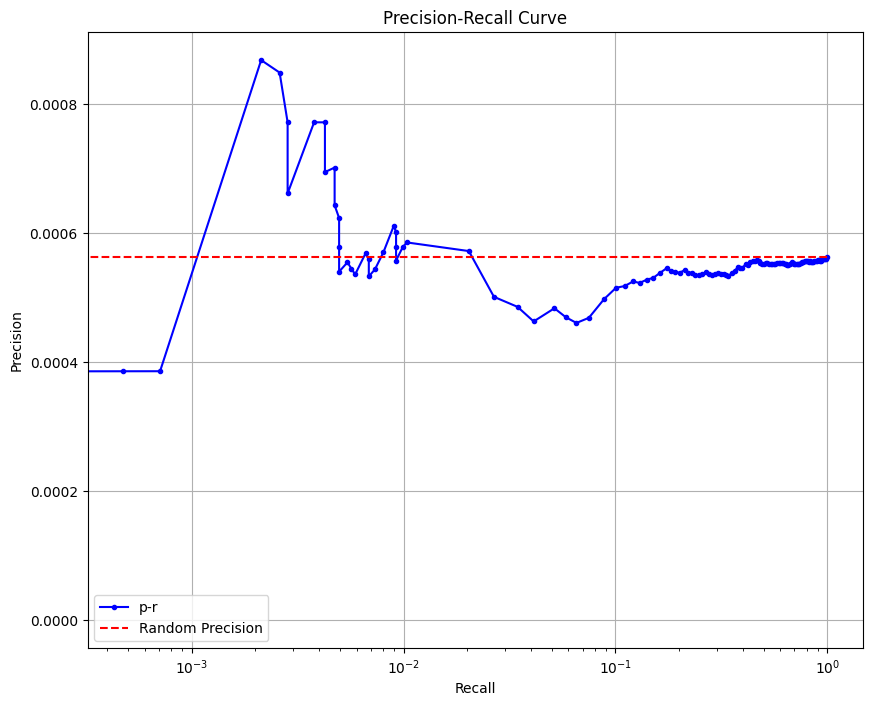

base enrichment
Top central genes: []


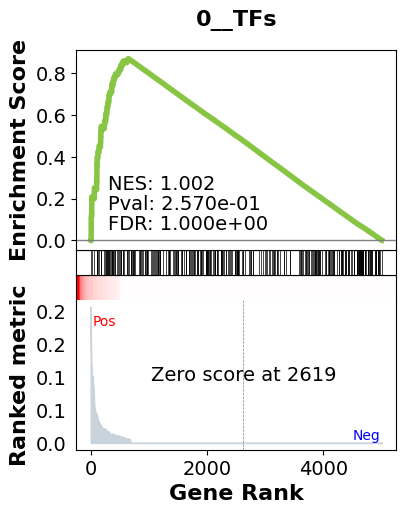

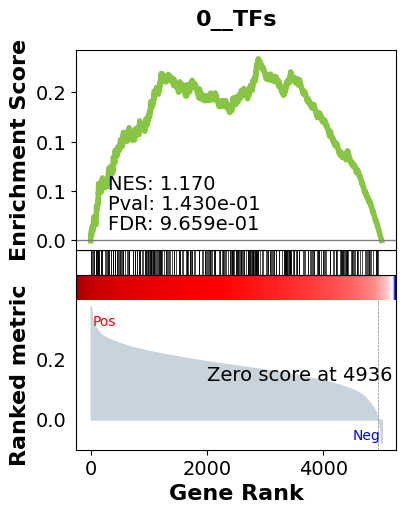

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2742 genes
intersection pct: 0.5484
precision:  0.0012380944988240044 
recall:  0.22618766249113684 
random precision: 0.0005629457429939134


 92%|█████████▏| 118/128 [00:01<00:00, 85.22it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 83.30it/s]


Average Precision (AP):  0.0007776983712388343
Area Under Precision-Recall Curve (AUPRC):  0.0007122002390873653
EPR: 2.523396015545674


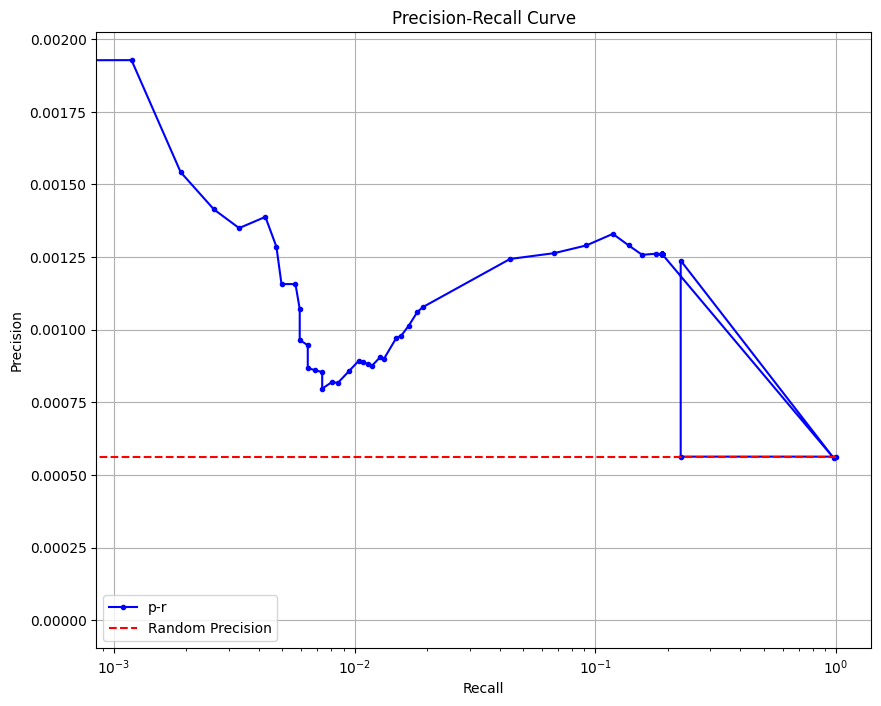

(23059, 70263)
7le
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.796108603477478 mse_loss: 0.7705586552619934 kl_loss: 0.02518285455153091 sparse_loss: 0.00036708310472022276
epoch: 2 0.7915084846317768 mse_loss: 0.7663465887308121 kl_loss: 0.02473565896070795 sparse_loss: 0.00042622281398507766
epoch: 4 0.17272952292114496 mse_loss: 0.1382458764128387 kl_loss: 0.03400128413341008 sparse_loss: 0.00048235936446872074
epoch: 5 0.16871469747275114 mse_loss: 0.13095329981297255 kl_loss: 0.037238555029034615 sparse_loss: 0.0005228404152148869
epoch: 7 0.14156421646475792 mse_loss: 0.10464426130056381 kl_loss: 0.03637640073429793 sparse_loss: 0.0005435534039861523
epoch: 8 0.15510776033625007 mse_loss: 0.11774072446860373 kl_loss: 0.0368104554945603 sparse_loss: 0.0005565780738834292
epoch: 10 0.13247581850737333 mse_loss: 0.09635080629959702 kl_loss: 0.03555784991476685 sparse_loss: 0.0005671619110216852
epoch: 11 0.12947507668286562 mse_loss: 0.0930779930204153 kl_loss: 0.03582237247610465 sparse_loss: 0.0005747094692196697
epoch: 13 0.110204

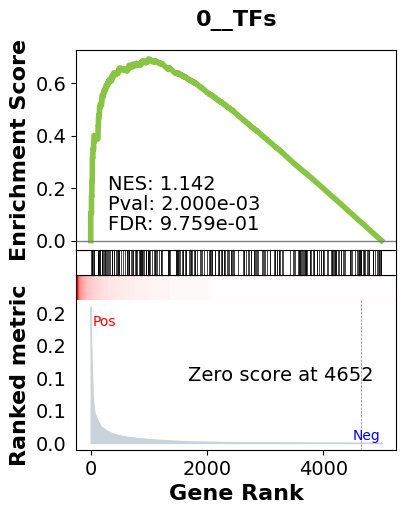

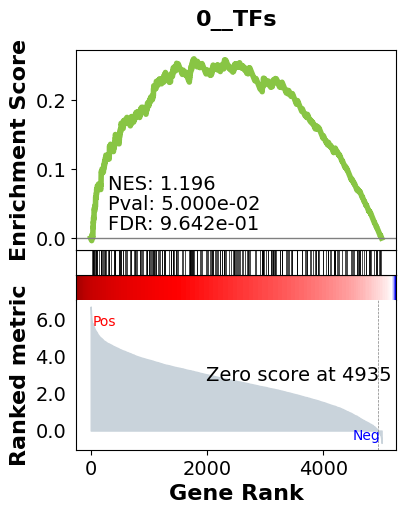

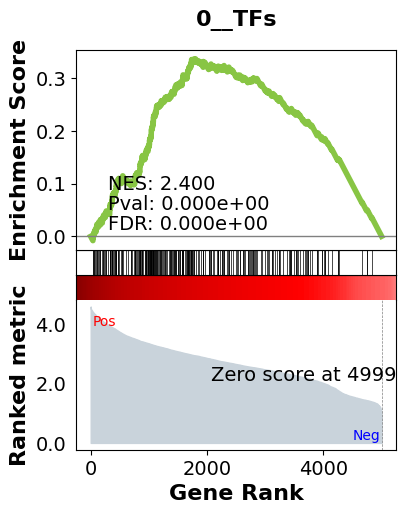

_________________________________________
TF specific enrichment
found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2132 genes
intersection pct: 0.4264
precision:  0.0008573168281422293 
recall:  1.0 
random precision: 0.0008573168281422293


 88%|████████▊ | 112/128 [00:00<00:00, 153.23it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 150.09it/s]


Average Precision (AP):  0.0009170313028851014
Area Under Precision-Recall Curve (AUPRC):  0.0009152745317366456
EPR: 1.1915371964819543


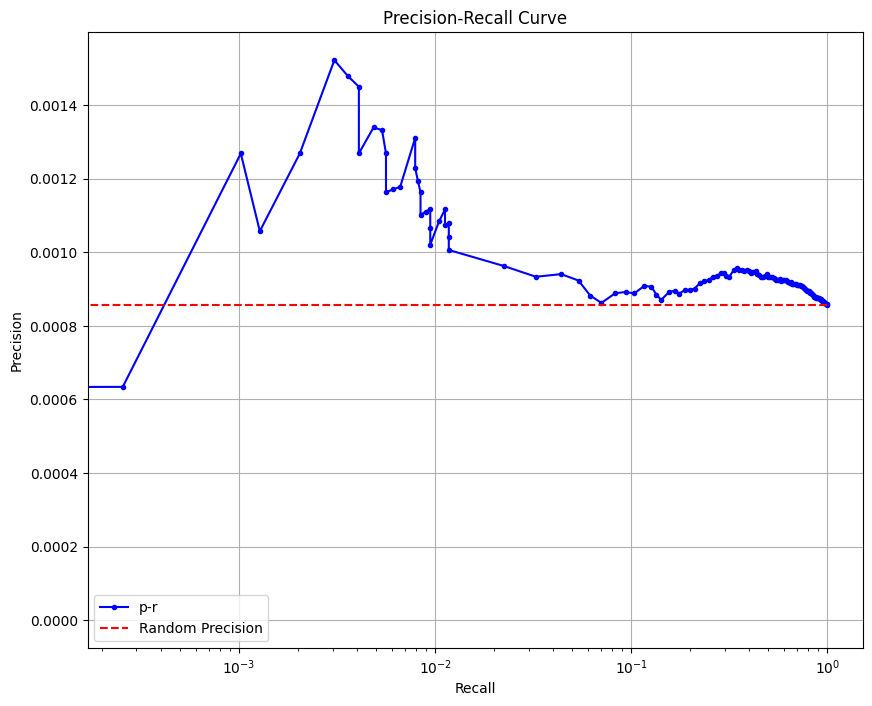

base enrichment
Top central genes: []


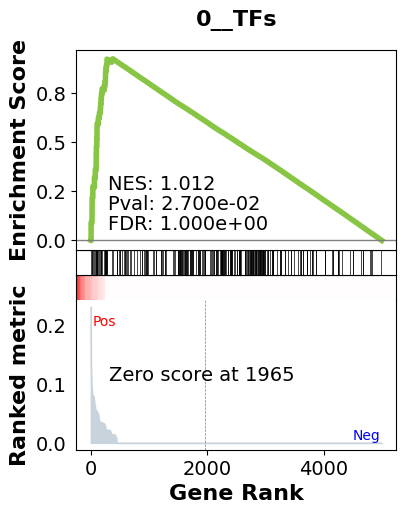

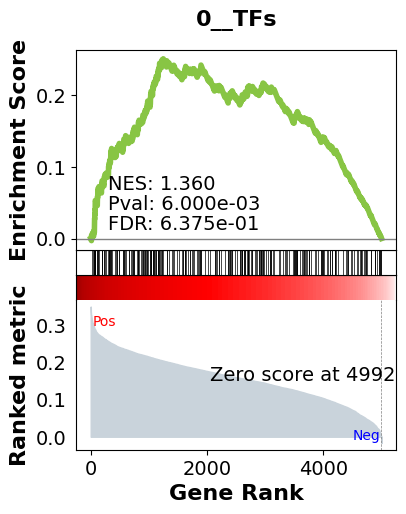

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2132 genes
intersection pct: 0.4264
precision:  0.003528064428736793 
recall:  0.4388562675516977 
random precision: 0.0008573168281422293


 97%|█████████▋| 124/128 [00:00<00:00, 146.44it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 146.69it/s]


Average Precision (AP):  0.002232542079496424
Area Under Precision-Recall Curve (AUPRC):  0.00207397212518963
EPR: 4.493503508957674


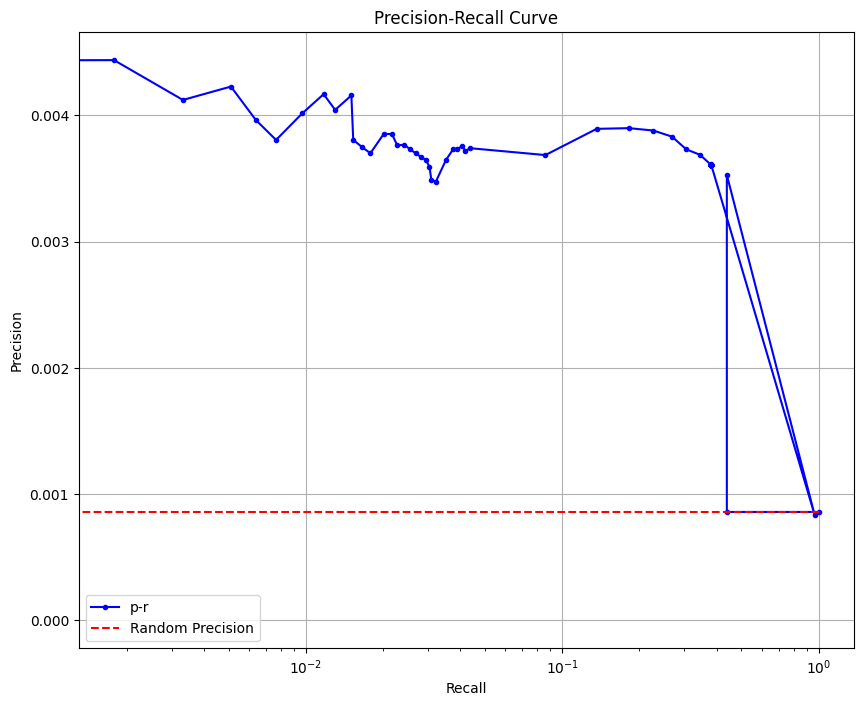

(23059, 70263)
Hu7
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.35099880397319794 mse_loss: 0.3149836498957414 kl_loss: 0.03561230268902504 sparse_loss: 0.00040286204267221573
epoch: 2 0.3587662485929636 mse_loss: 0.3197372784981361 kl_loss: 0.03855897758442622 sparse_loss: 0.00046999384246121807
epoch: 4 0.2204403648009667 mse_loss: 0.1811568204026956 kl_loss: 0.038780579558358744 sparse_loss: 0.0005029615041656563
epoch: 5 0.18960107003266996 mse_loss: 0.14923237837277925 kl_loss: 0.03984331798094969 sparse_loss: 0.0005253730879093592
epoch: 7 0.17963007379036683 mse_loss: 0.13959469990088388 kl_loss: 0.03949742004848444 sparse_loss: 0.0005379523096892696
epoch: 8 0.1961167179621183 mse_loss: 0.1561888920573088 kl_loss: 0.03938085184647487 sparse_loss: 0.0005469701181237514
epoch: 10 0.16214058089714783 mse_loss: 0.12450308381364895 kl_loss: 0.03708256401408177 sparse_loss: 0.0005549302709718737
epoch: 11 0.16118039477329987 mse_loss: 0.12330002767535356 kl_loss: 0.037318225305240885 sparse_loss: 0.0005621390524678505
epoch: 13 0.15172

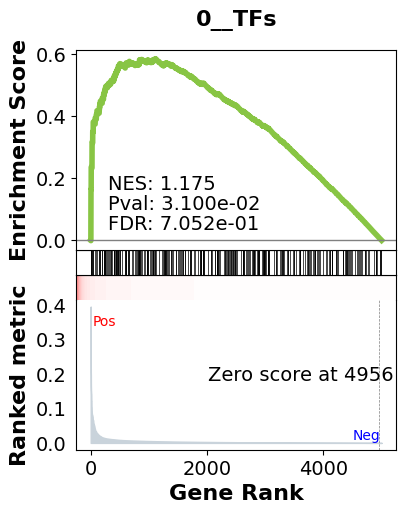

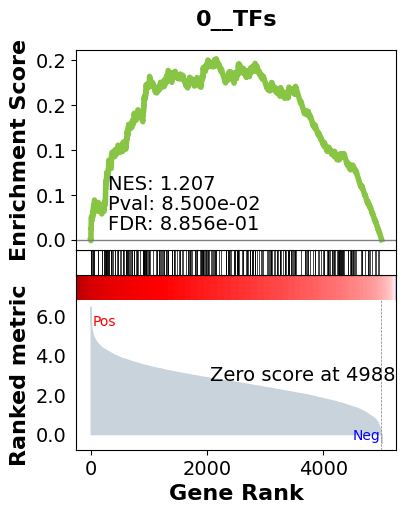

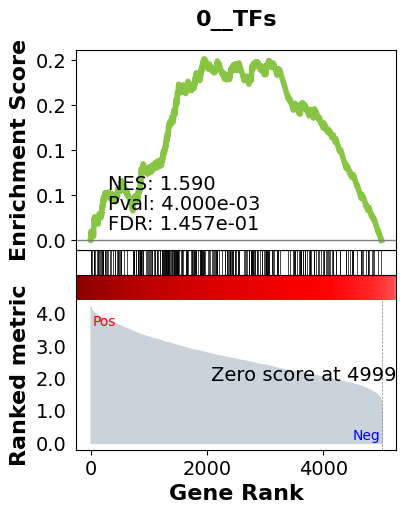

_________________________________________
TF specific enrichment
found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2618 genes
intersection pct: 0.5236
precision:  0.0009725153131388381 
recall:  1.0 
random precision: 0.0009725153131388381


 97%|█████████▋| 124/128 [00:01<00:00, 87.68it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 86.44it/s]


Average Precision (AP):  0.0010582802888040796
Area Under Precision-Recall Curve (AUPRC):  0.0010576720787715728
EPR: 0.771277330099571


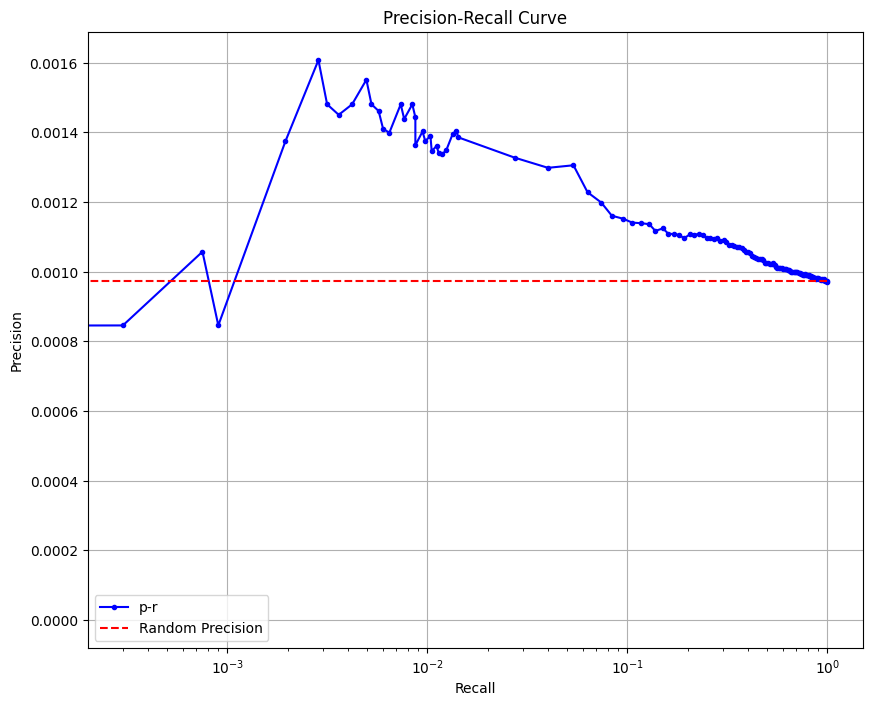

base enrichment
Top central genes: []


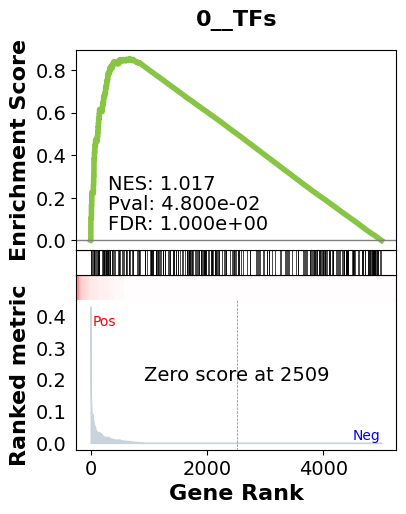

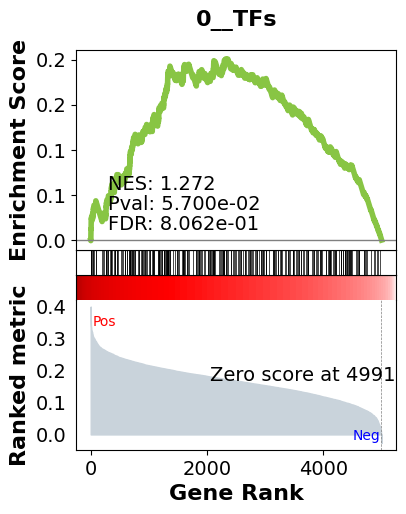

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2618 genes
intersection pct: 0.5236
precision:  0.005227299158285519 
recall:  0.5194356896292961 
random precision: 0.0009725153131388381


 95%|█████████▍| 121/128 [00:01<00:00, 86.73it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 84.21it/s]


Average Precision (AP):  0.0034245636308932762
Area Under Precision-Recall Curve (AUPRC):  0.0032889835082445112
EPR: 5.920277599145604


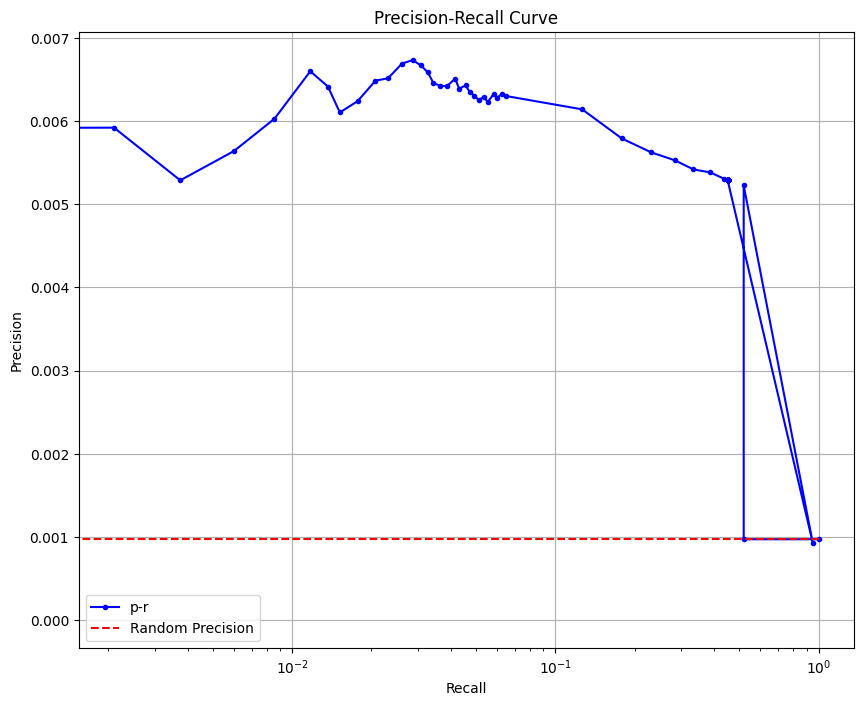

(23059, 70263)
D0u
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.5229941556851069 mse_loss: 0.4852299392223358 kl_loss: 0.037375154749800764 sparse_loss: 0.0003890568623319268
epoch: 2 0.5535280307133993 mse_loss: 0.5079782257477442 kl_loss: 0.04507537465542555 sparse_loss: 0.000474436063086614
epoch: 4 0.3586132029692332 mse_loss: 0.3079640393455823 kl_loss: 0.050140765185157456 sparse_loss: 0.0005084055204254886
epoch: 5 0.400137464205424 mse_loss: 0.3475438530246417 kl_loss: 0.05206486241271099 sparse_loss: 0.0005287572760911038
epoch: 7 0.3472864975531896 mse_loss: 0.2903679509957631 kl_loss: 0.05637523780266444 sparse_loss: 0.00054332041569675
epoch: 8 0.42441826562086743 mse_loss: 0.3671350032091141 kl_loss: 0.056727662682533264 sparse_loss: 0.0005555960330336044
epoch: 10 0.35085444152355194 mse_loss: 0.3006894960999489 kl_loss: 0.04960015074660381 sparse_loss: 0.0005647956762307634
epoch: 11 0.5734726935625076 mse_loss: 0.5231726070245107 kl_loss: 0.04972399491816759 sparse_loss: 0.000576076660460482
epoch: 13 0.3018314590056737 m

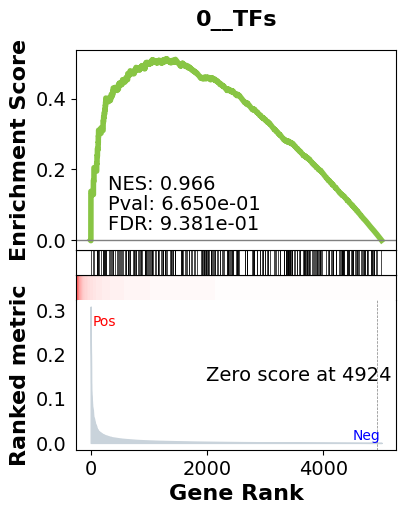

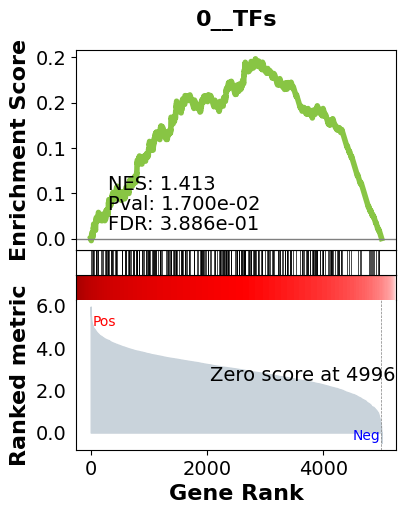

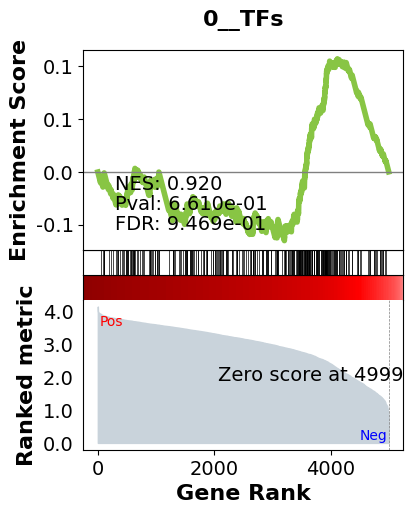

_________________________________________
TF specific enrichment
found some significant results for  25.806451612903224 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3129 genes
intersection pct: 0.6258
precision:  0.0010571634548187526 
recall:  0.9997101449275362 
random precision: 0.001057469967852913


 97%|█████████▋| 124/128 [00:02<00:00, 54.13it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.54it/s]


Average Precision (AP):  0.0010394616045232405
Area Under Precision-Recall Curve (AUPRC):  0.001039421851065017
EPR: 0.9135076639891653


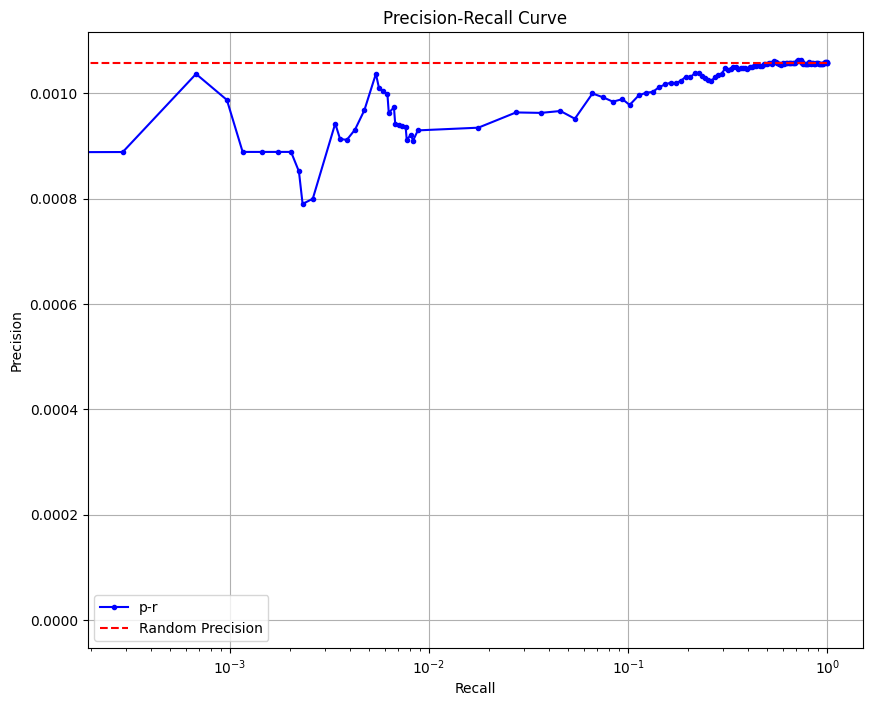

base enrichment
Top central genes: []


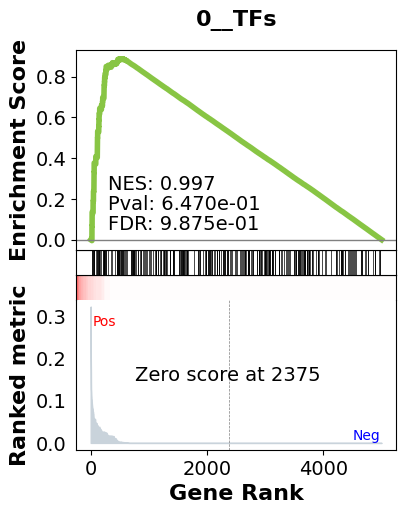

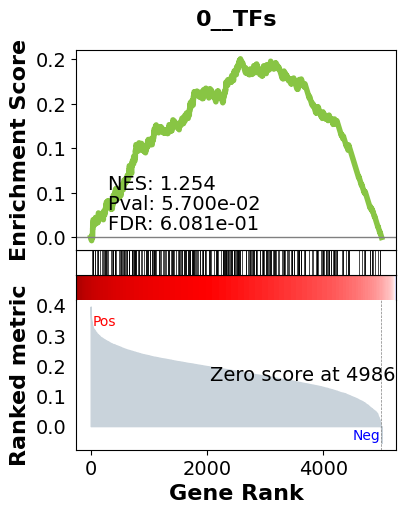

_________________________________________
TF specific enrichment
found some significant results for  9.67741935483871 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3129 genes
intersection pct: 0.6258
precision:  0.005889591275394489 
recall:  0.4716908212560387 
random precision: 0.001057469967852913


 98%|█████████▊| 125/128 [00:01<00:00, 63.61it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 63.00it/s]


Average Precision (AP):  0.00351925432152386
Area Under Precision-Recall Curve (AUPRC):  0.003404161288142531
EPR: 5.347906992235583


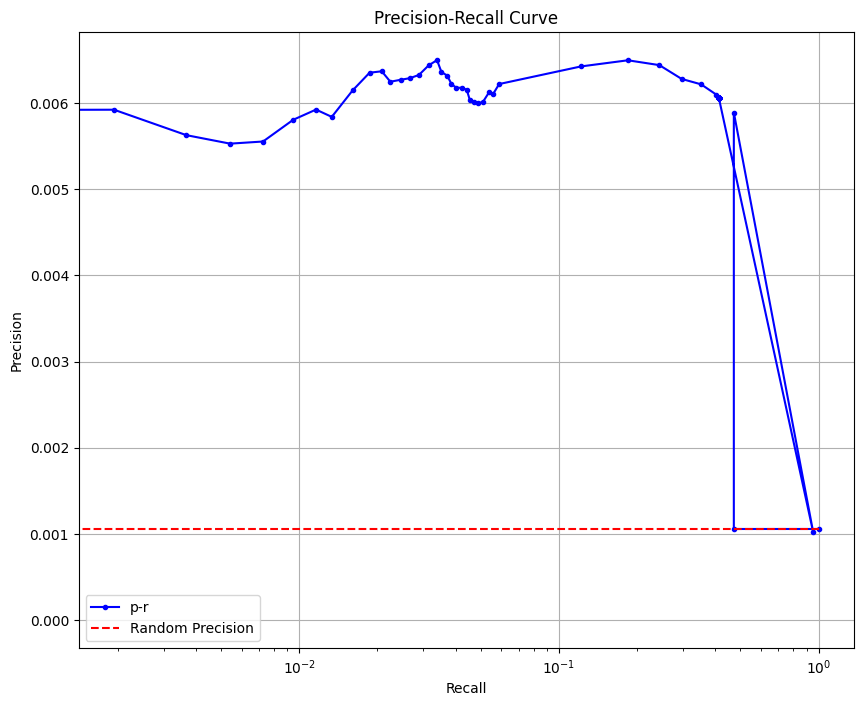

(23059, 70263)
M0U
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.8571950137615204 mse_loss: 0.8329274713993072 kl_loss: 0.02395326377591118 sparse_loss: 0.0003142641275189817
epoch: 2 1.0301557183265686 mse_loss: 1.005938994884491 kl_loss: 0.02386257649632171 sparse_loss: 0.0003541590936947614
epoch: 4 0.5606136918067932 mse_loss: 0.5303521573543548 kl_loss: 0.029864482395350934 sparse_loss: 0.00039703626534901557
epoch: 5 0.576027262210846 mse_loss: 0.5426555454730988 kl_loss: 0.03293642532080412 sparse_loss: 0.0004352769290562719
epoch: 7 0.3570277154445648 mse_loss: 0.31359951496124266 kl_loss: 0.042967576161026956 sparse_loss: 0.00046062826295383273
epoch: 8 0.3997424155473709 mse_loss: 0.35292536914348605 kl_loss: 0.046337129548192024 sparse_loss: 0.0004799144109711051
epoch: 10 0.33563606142997743 mse_loss: 0.2843335747718811 kl_loss: 0.05080877728760243 sparse_loss: 0.0004937065299600363
epoch: 11 0.32926619946956637 mse_loss: 0.27658903896808623 kl_loss: 0.05217179618775845 sparse_loss: 0.000505362602416426
epoch: 13 0.29482038021

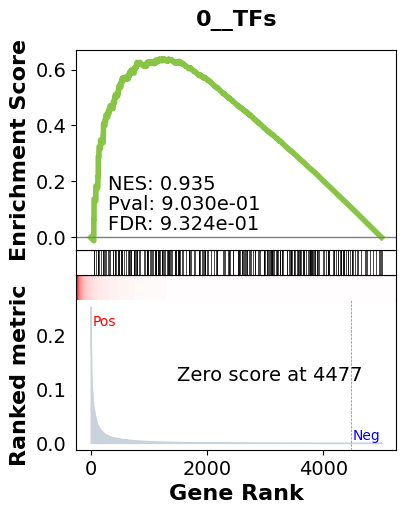

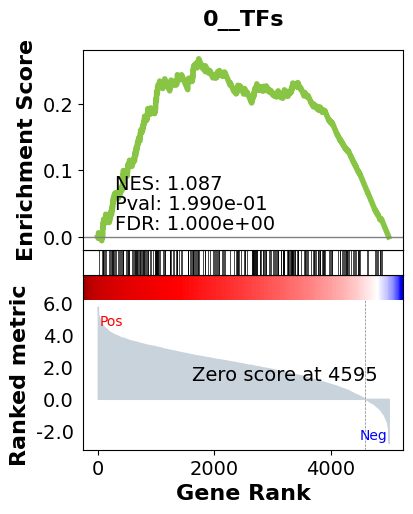

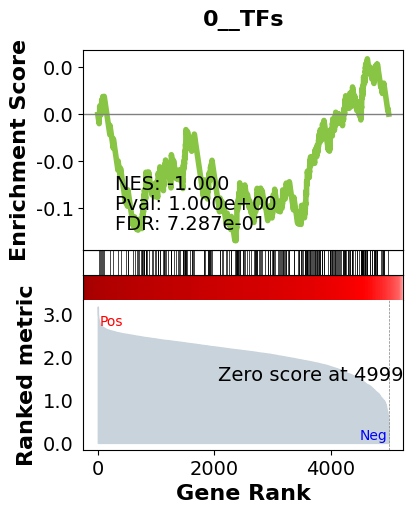

_________________________________________
TF specific enrichment
found some significant results for  16.129032258064516 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0011614497733553038 
recall:  0.9999235824545316 
random precision: 0.0011615385352791367


 98%|█████████▊| 125/128 [00:02<00:00, 50.20it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.19it/s]


Average Precision (AP):  0.001096412471211164
Area Under Precision-Recall Curve (AUPRC):  0.0010959641118325524
EPR: 0.9868188336060534


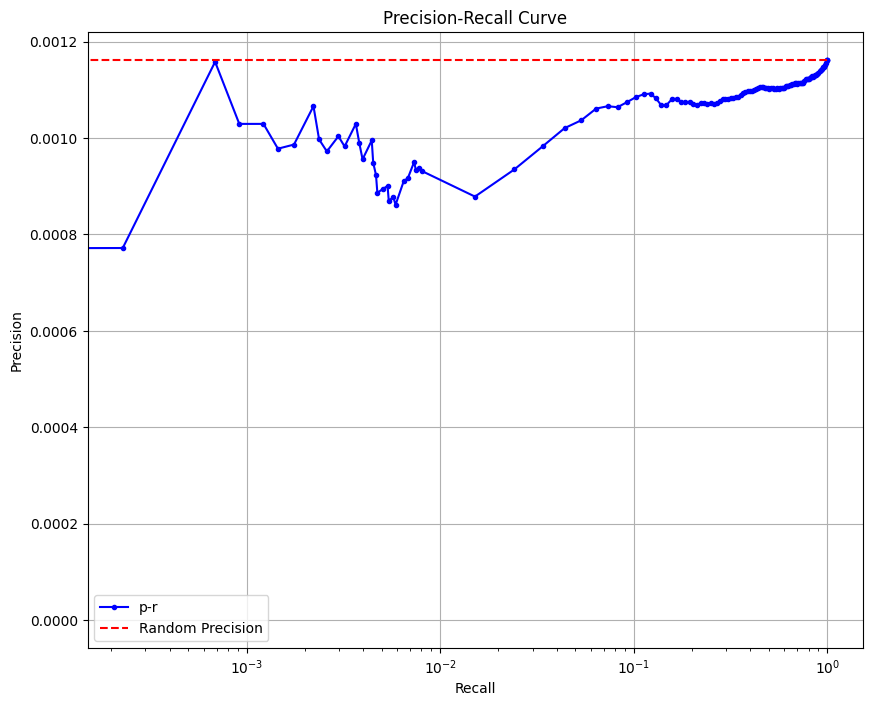

base enrichment
Top central genes: []


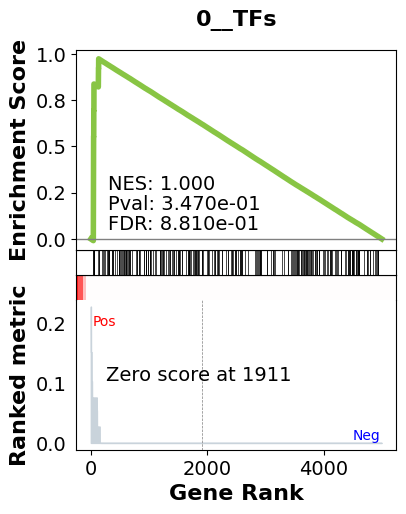

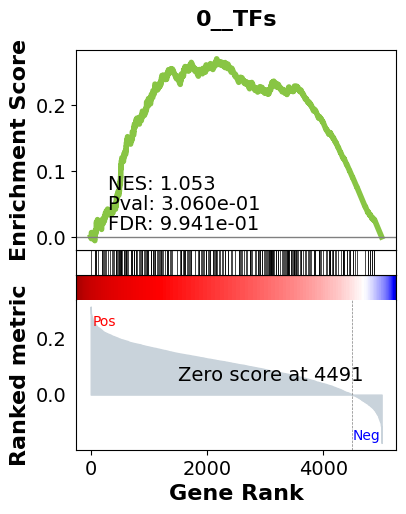

_________________________________________
TF specific enrichment
found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0063007671183966645 
recall:  0.36680421824850984 
random precision: 0.0011615385352791367


 96%|█████████▌| 123/128 [00:02<00:00, 53.06it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 51.40it/s]


Average Precision (AP):  0.002868285349012946
Area Under Precision-Recall Curve (AUPRC):  0.0027349265616412885
EPR: 4.510100566050326


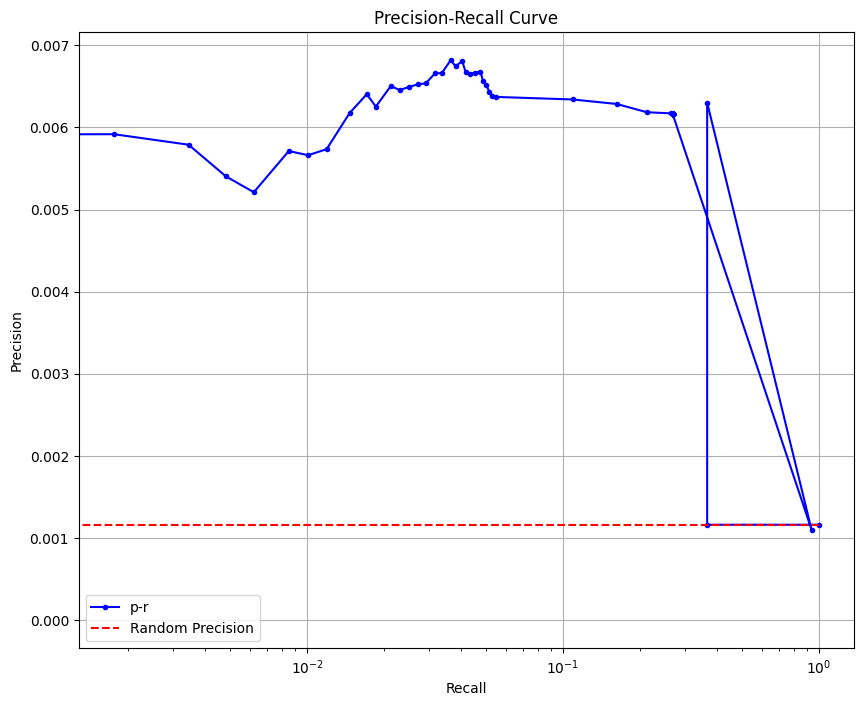

In [7]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
print(adata.shape)
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(adata.shape)
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['genie3_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [8]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [9]:
metrics

{'deepsem_fibroblast': {'enriched_terms_Central': ['celltype.gmt__Renal interstitium (Mesenchymal cells)',
   'celltype.gmt__Pancreatic stellate cells'],
  'TF_enr': False,
  'enriched_terms_Regulators': ['celltype.gmt__Cone bipolar cells',
   'celltype.gmt__Enteroendocrine cells'],
  'enriched_terms_Targets': ['celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Pancreatic stellate cells',
   'celltype.gmt__Smooth muscle cells',
   'celltype.gmt__Mesangial cells',
   'celltype.gmt__Stromal cells',
   'celltype.gmt__Fibroblasts',
   'celltype.gmt__Microfold cells',
   'celltype.gmt__Adipose progenitor cells',
   'celltype.gmt__Enteric glia cells',
   'celltype.gmt__Pulmonary alveolar type I cells',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Myofibroblasts',
   'celltype.gmt__Mesenchymal stem cells',
   'celltype.gmt__Extracellular matrix cells',
   'celltype.gmt__Endothelial',
   'celltype.gmt__Keratinocytes',
   'celltype.gmt__Renal interstitium (Mesenchymal cells)',
 

In [11]:
False
False
True
False
True
False
True
False
True
False
False
False
True
False


True

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,fibroblast,0.977292,0.001437,0.001424,35.000000,False,False
1,fibroblast,4.864360,0.006355,0.001424,0.000000,False,False
2,endothelial cell,0.968473,0.001681,0.001770,8.196721,True,False
3,endothelial cell,4.515857,0.003922,0.001770,3.278689,False,False
4,myofibroblast cell,0.419572,0.000544,0.000563,43.750000,False,False
5,myofibroblast cell,2.523396,0.000712,0.000563,0.000000,False,False
6,glial cell,1.191537,0.000915,0.000857,7.142857,True,False
7,glial cell,4.493504,0.002074,0.000857,0.000000,False,False
8,pericyte,0.771277,0.001058,0.000973,28.571429,False,False
9,pericyte,5.920278,0.003289,0.000973,0.000000,False,False
